In [1]:
import main as m
import homography as h
import filter as f
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from PIL import Image
from numba import jit

ModuleNotFoundError: No module named 'numba'

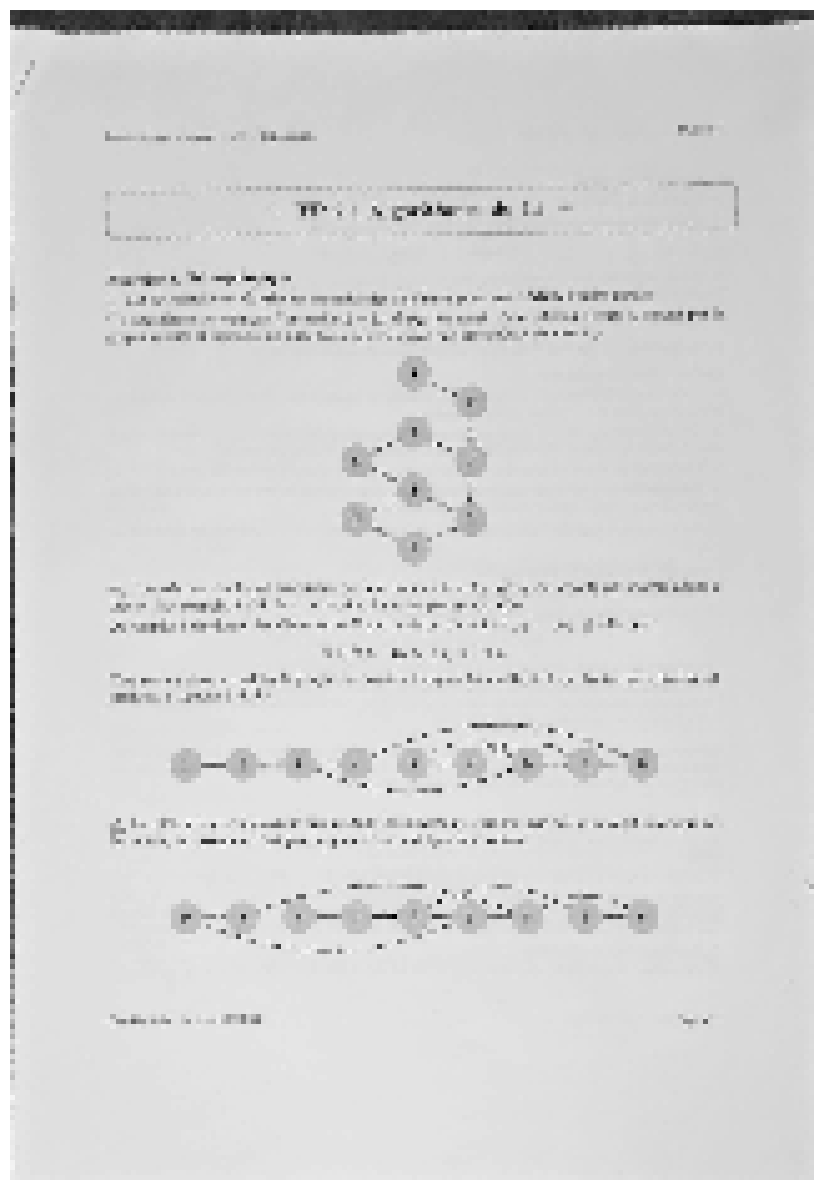

In [2]:
I = m.Compresser(m.ImportAsPng("export/Rebuild.png"), 5)
m.Afficher(I)

In [3]:
Norme = 0

In [4]:
def NormeLocale(M, C:(int, int), n=1):
    '''
    M : Image
    C : Taille de la plage
    n : norme 1, 2 ...
    return l'intégrale dans la plage [0,x], [0,y]
    '''
    x, y = C
    mx, my = M.shape
    I = 0
    for i in range(x):
    	for j in range(y):
            if x<mx and y<my:
                I += M[i,j]**n
    return I

In [5]:
def MoyenneRectange(M, C, T):
    '''
    M : Image
    n : Moyenne 1, 2, ...
    C : Position du pixel
    T : Taille du rectangle 
    '''
    x,y = C
    dx,dy = T
    maxx, maxy = M.shape
    if x-dx<0 or y-dy<0 or x+dx>=maxx-1 or y+dy>=maxy-1:
        dx = min(maxx-x-1, x)
        dy = min(maxy-y-1, y)
    N = (2*dx+1)*(2*dy+1)
    m = (NormeLocale(M,(x+dx,y+dy),1) + NormeLocale(M,(x-dx,y-dy),1)
         - NormeLocale(M,(x-dx,y-dy),1) - NormeLocale(M,(x+dx,y-dy),1))*(1/N)
    return m

In [6]:
def VarianceRectangle(M, C:(int,int), T:(int,int)):
    '''
    M : Image
    (x,y) : Position du pixel
    (dx,dy) : Taille du rectangle 
    '''
    x,y = C
    dx,dy = T
    N = (2*dx+1)*(2*dy+1)
    S = (NormeLocale(M,(x+dx,y+dy),2) + NormeLocale(M,(x-dx,y-dy),2)
         - NormeLocale(M,(x+dx,y-dy),2) - NormeLocale(M,(x+dx,y-dy),2))*1/(N-1) - (1/N)*(MoyenneRectange(M,(x,y),(dx,dy))*N)**2
    return S

In [9]:
def Niblack(I, k, S):
    x,y = I.shape
    P = []
    for i in range(x):
        for j in range(y):
            m = MoyenneRectange(I, (i,j), (S,S))
            v = VarianceRectangle(I, (i,j), (S,S))
            P.append((m, v))
        print("Row")
    return P